# Covid-19 EDA - John Hopkins University Dataset

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths and reported recoveries. Data is disaggregated by country (and sometimes subregion). Coronavirus disease (COVID-19) is caused by the Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes time series data tracking the number of people affected by COVID-19 worldwide, including:

- confirmed tested cases of Coronavirus infection
- the number of people who have reportedly died while sick with Coronavirus
- the number of people who have reportedly recovered from it

Reference links:

- Novel Coronavirus 2019 time series data on cases https://datahub.io/core/covid-19
- Kaggle data analysis https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons/notebook#Dataset
- Kaggle Dashboard https://covid19-dash.herokuapp.com/
- Github data source https://github.com/datasets/covid-19
- John Hopkins Covid-19 Website https://systems.jhu.edu/research/public-health/ncov/
- Using the data responsibly https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8
- Canada specific plots https://www.macleans.ca/society/health/coronavirus-in-canada-these-charts-show-how-our-fight-to-flatten-the-curve-is-going/
- How fast does a virus spread? https://www.wired.com/story/how-fast-does-a-virus-spread/
- JHU Journal Article https://systems.jhu.edu/research/public-health/ncov-model-2/

In [1]:
# Import libraries

#import os
#import json
#import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plotly libraries
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
#import plotly.plotly as py

#to get continents
import pycountry as pc
from datapackage import package

# dash components
import dash
import dash_table
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

# Dash for jupyter
import jupyterlab_dash

Instead of downloading each csv locally, we connect to the github raw csv data set (master) for the latest data

In [9]:
# csv from github url

url_1 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
url_2 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
url_3 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv'
url_4 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv'

# US specific data sets
url_5 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/us_confirmed.csv'
url_6 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/us_deaths.csv'

# reset index because date is original index

time_series = pd.read_csv(url_1, index_col=0,parse_dates=[0]).reset_index()
#print (varname(time_series) + ' data loaded to data frame')
countries = pd.read_csv(url_2, index_col=0,parse_dates=[0]).reset_index()
countries_pv = pd.read_csv(url_3, index_col=0,parse_dates=[0]).reset_index()
ww_agg = pd.read_csv(url_4, index_col=0,parse_dates=[0]).reset_index()
usc = pd.read_csv(url_5, index_col=0,parse_dates=[0]).reset_index()
usd = pd.read_csv(url_6, index_col=0,parse_dates=[0]).reset_index()

print('The dataset was last updated: '+ str(time_series['Date'].max()))

The dataset was last updated: 2020-04-13 00:00:00


In [30]:
# import 4 main data files
#countries = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\countries-aggregated.csv')
#countries_pv = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\key-countries-pivoted.csv')
#time_series = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\time-series-19-covid-combined.csv')
#ww_agg = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\worldwide-aggregated.csv')

Convert date columns to datetime

In [10]:
# convert Date object to Datetime
countries['Date'] = pd.to_datetime(countries['Date'])
countries_pv['Date'] = pd.to_datetime(countries_pv['Date'])
time_series['Date'] = pd.to_datetime(time_series['Date'])
ww_agg['Date'] = pd.to_datetime(ww_agg['Date'])
usc['Date'] = pd.to_datetime(usc['Date'])
usd['Date'] = pd.to_datetime(usd['Date'])

Set most recent date as a variable, for easy reference

In [11]:
last_date = time_series['Date'].max()
#last_date

In [5]:
countries.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [22]:
countries_pv.head()

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,643,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,0,2,0,0,0
3,2020-01-25,1406,2,0,0,3,0,0,0
4,2020-01-26,2075,5,0,0,3,0,0,0


In [23]:
time_series.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [24]:
ww_agg.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


## Global Time Series Data Transformation

Create a new time series dataframe with additional statistics

In [12]:
covid_ts = time_series.copy()

covid_ts['Province/State'] = covid_ts['Province/State'].fillna(covid_ts['Country/Region'])

covid_ts['Active'] = covid_ts['Confirmed'] - covid_ts['Recovered']

#covid_ts.rename(columns = {'Country/Region': 'Country'}, inplace = True)
covid_ts['Description'] = covid_ts['Country/Region'] + ', ' \
+ ' Confirmed: ' + covid_ts['Confirmed'].astype(str) + ',' \
+ ' Deaths: ' + covid_ts['Deaths'].astype(str) + ',' \
+ ' Recovered: ' + covid_ts['Recovered'].astype(str)

covid_ts = covid_ts.dropna(axis=0, subset=['Confirmed'])
#covid_ts = covid_ts.fillna(0)

covid_ts = covid_ts.assign(logCumConf = np.where(covid_ts['Confirmed'] > 0, np.log(covid_ts['Confirmed']) / np.log(2), 0))

covid_ts[covid_ts['Confirmed']>0].tail()

C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log

C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

invalid value encountered in log



,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Active,Description,logCumConf
21907,2020-04-09,Zimbabwe,Zimbabwe,-20.0,30.0,11.0,0.0,3.0,11.0,"Zimbabwe, Confirmed: 11.0, Deaths: 3.0, Recov...",3.459432
21908,2020-04-10,Zimbabwe,Zimbabwe,-20.0,30.0,13.0,0.0,3.0,13.0,"Zimbabwe, Confirmed: 13.0, Deaths: 3.0, Recov...",3.700440
21909,2020-04-11,Zimbabwe,Zimbabwe,-20.0,30.0,14.0,0.0,3.0,14.0,"Zimbabwe, Confirmed: 14.0, Deaths: 3.0, Recov...",3.807355
21910,2020-04-12,Zimbabwe,Zimbabwe,-20.0,30.0,14.0,0.0,3.0,14.0,"Zimbabwe, Confirmed: 14.0, Deaths: 3.0, Recov...",3.807355
21911,2020-04-13,Zimbabwe,Zimbabwe,-20.0,30.0,17.0,0.0,3.0,17.0,"Zimbabwe, Confirmed: 17.0, Deaths: 3.0, Recov...",4.087463


In [12]:
covid_ts['Confirmed'].notnull().shape
#covid_ts['Confirmed'].pct_change().head().reset_index()

(21829,)

### Investigate Impact of Worldwide Cases

Lets look at the top 10 countries by confirmed, deaths and recovered cases

In [30]:
# Top 10 confirmed cases, deaths, recoveries, recovered

agg_stats = covid_ts[covid_ts['Date'] == last_date].groupby(['Country/Region'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

t10c = agg_stats.sort_values('Confirmed', ascending = False).reset_index(drop=True).head(10)
t10d = agg_stats.sort_values('Deaths', ascending = False).reset_index(drop=True).head(10)
t10r = agg_stats.sort_values('Recovered', ascending = False).reset_index(drop=True).head(10)
t10a = agg_stats.sort_values('Active', ascending = False).reset_index(drop=True).head(10)

t10c

C:\Users\vijay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,580619.0,23529.0,43482.0,537137.0
1,Spain,170099.0,17756.0,64727.0,105372.0
2,Italy,159516.0,20465.0,35435.0,124081.0
3,France,137875.0,14986.0,28001.0,109874.0
4,Germany,130072.0,3194.0,64300.0,65772.0
5,United Kingdom,89570.0,11347.0,304.0,89266.0
6,China,83213.0,3345.0,78039.0,5174.0
7,Iran,73303.0,4585.0,45983.0,27320.0
8,Turkey,61049.0,1296.0,3957.0,57092.0
9,Belgium,30589.0,3903.0,6707.0,23882.0


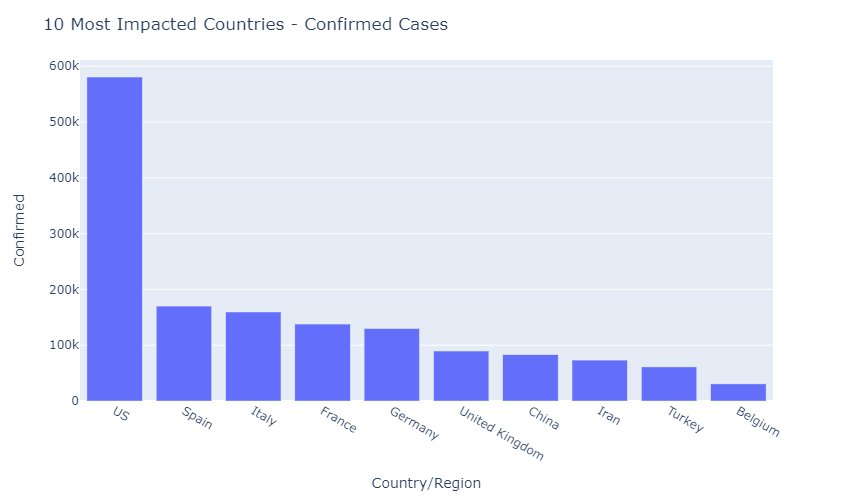

In [23]:
# Plot top 10 confirmed cases by country

fig0 = px.bar(t10c, x = 'Country/Region', y = 'Confirmed'
             ,height=500
            ,width=900)
fig0.update_layout(title="10 Most Impacted Countries - Confirmed Cases")
fig0.show()

Now, lets visualize this data by creating a grouped bar chart by top 10 countries with confirmed cases

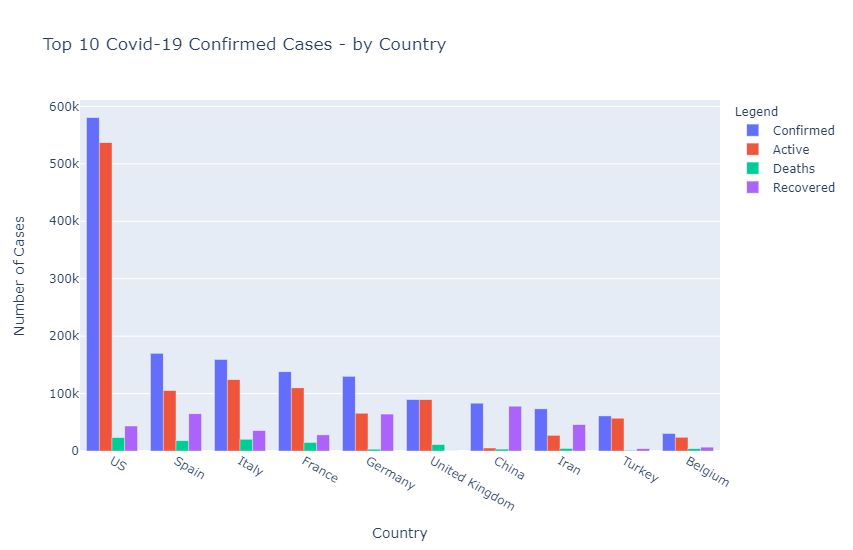

In [15]:
# Create plotly grouped bar chart

fig1 = go.Figure(data=[
    go.Bar(name='Confirmed', x=t10c['Country/Region'], y=t10c['Confirmed'])
    ,go.Bar(name='Active', x=t10c['Country/Region'], y=t10c['Active'])
    ,go.Bar(name='Deaths', x=t10c['Country/Region'], y=t10c['Deaths'])
    ,go.Bar(name='Recovered', x=t10c['Country/Region'], y=t10c['Recovered'])  
])

# Change the bar mode
fig1.update_layout(barmode='group'
                  ,showlegend=True
                  ,title = 'Top 10 Covid-19 Confirmed Cases - by Country'
                  ,legend_title='Legend'
                  ,xaxis_title = 'Country'
                  ,yaxis_title = 'Number of Cases'
                  ,height=550
                  ,width=900
                 )
fig1.show()

### Mapping 2019-nCov

In [16]:
'''
df = px.data.gapminder()
fig2 = px.scatter_geo(covid_ts,
                     #lat="Lat"
                     #lon="Long" # for some reason this throws an error
                     locations = "Country/Region",
                     locationmode = "country names",
                     color = "Country/Region",
                     #mode="markers",
                     hover_name = "Description", 
                     #size = "Confirmed",
                     size = "logCumConf",
                     animation_frame = covid_ts["Date"].astype(str),
                     projection = "natural earth",
                     template = "plotly_dark",
                     title = "Covid-19 Confirmed Cases over Time")
fig2.update_geos(fitbounds = "locations") # adjust map to best fit data points
fig2.show()
'''

'\ndf = px.data.gapminder()\nfig2 = px.scatter_geo(covid_ts,\n                     #lat="Lat"\n                     #lon="Long" # for some reason this throws an error\n                     locations = "Country/Region",\n                     locationmode = "country names",\n                     color = "Country/Region",\n                     #mode="markers",\n                     hover_name = "Description", \n                     #size = "Confirmed",\n                     size = "logCumConf",\n                     animation_frame = covid_ts["Date"].astype(str),\n                     projection = "natural earth",\n                     template = "plotly_dark",\n                     title = "Covid-19 Confirmed Cases over Time")\nfig2.update_geos(fitbounds = "locations") # adjust map to best fit data points\nfig2.show()\n'

### Time Series of Global Cases

In [25]:
country_ts = covid_ts.groupby(['Date', 'Country/Region']).sum().reset_index().sort_values('Date')
country_ts

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths,Active,logCumConf
0,2020-01-22,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,0.0,0.000000
118,2020-01-22,Namibia,-22.9576,18.4904,0.0,0.0,0.0,0.0,0.000000
119,2020-01-22,Nepal,28.1667,84.2500,0.0,0.0,0.0,0.0,0.000000
120,2020-01-22,Netherlands,107.0417,-265.0278,0.0,0.0,0.0,0.0,0.000000
121,2020-01-22,New Zealand,-40.9006,174.8860,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
15234,2020-04-13,Georgia,42.3154,43.3569,272.0,68.0,3.0,204.0,8.087463
15235,2020-04-13,Germany,51.0000,9.0000,130072.0,64300.0,3194.0,65772.0,16.988951
15236,2020-04-13,Ghana,7.9465,-1.0232,566.0,4.0,8.0,562.0,9.144658
15227,2020-04-13,Eswatini,-26.5225,31.4659,15.0,7.0,0.0,8.0,3.906891


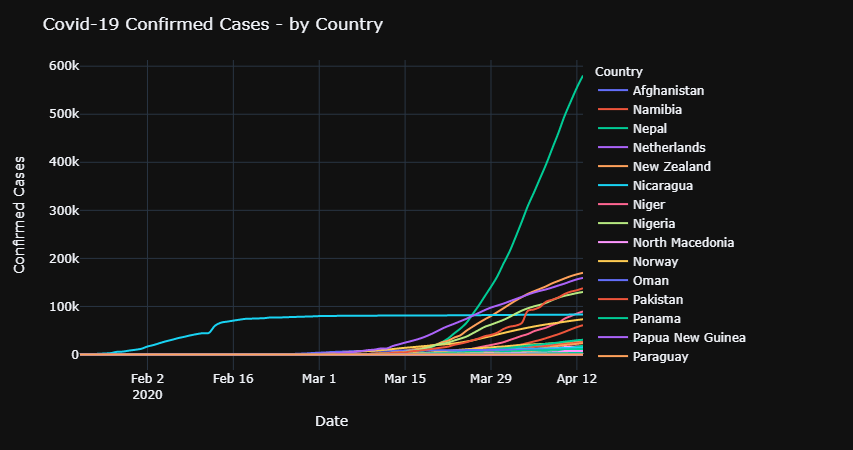

In [29]:
fig3 = px.line(x=country_ts['Date'], 
        y=country_ts["Confirmed"], 
        color=country_ts["Country/Region"], 
        hover_name=country_ts["Country/Region"],
        line_shape="spline", 
        render_mode="svg", 
        template='plotly_dark'
        ,height=550
        ,width=900
)

# Add labels
fig3.update_layout(
    title = "Covid-19 Confirmed Cases - by Country",
    xaxis_title = "Date",
    yaxis_title = "Confirmed Cases",
    legend_title = "Country"
)

fig3.show()

## Cases in Canada

Let's now explore Canada in more depth, as of 2020-04-12, it is not in the top 10 Confirmed

In [31]:
covid_ts[covid_ts['Country/Region'] == 'Canada'].groupby('Province/State').tail().reset_index(drop=True)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Active,Description,logCumConf
0,2020-04-09,Canada,Alberta,53.9333,-116.5765,1423.0,NaN,29.0,NaN,"Canada, Confirmed: 1423.0, Deaths: 29.0, Reco...",10.474720
1,2020-04-10,Canada,Alberta,53.9333,-116.5765,1451.0,NaN,32.0,NaN,"Canada, Confirmed: 1451.0, Deaths: 32.0, Reco...",10.502832
2,2020-04-11,Canada,Alberta,53.9333,-116.5765,1567.0,NaN,40.0,NaN,"Canada, Confirmed: 1567.0, Deaths: 40.0, Reco...",10.613789
3,2020-04-12,Canada,Alberta,53.9333,-116.5765,1567.0,NaN,40.0,NaN,"Canada, Confirmed: 1567.0, Deaths: 40.0, Reco...",10.613789
4,2020-04-13,Canada,Alberta,53.9333,-116.5765,1732.0,NaN,46.0,NaN,"Canada, Confirmed: 1732.0, Deaths: 46.0, Reco...",10.758223
...,...,...,...,...,...,...,...,...,...,...,...
65,2020-04-09,Canada,Yukon,64.2823,-135.0000,7.0,NaN,0.0,NaN,"Canada, Confirmed: 7.0, Deaths: 0.0, Recovere...",2.807355
66,2020-04-10,Canada,Yukon,64.2823,-135.0000,8.0,NaN,0.0,NaN,"Canada, Confirmed: 8.0, Deaths: 0.0, Recovere...",3.000000
67,2020-04-11,Canada,Yukon,64.2823,-135.0000,8.0,NaN,0.0,NaN,"Canada, Confirmed: 8.0, Deaths: 0.0, Recovere...",3.000000
68,2020-04-12,Canada,Yukon,64.2823,-135.0000,8.0,NaN,0.0,NaN,"Canada, Confirmed: 8.0, Deaths: 0.0, Recovere...",3.000000


## Create Dashboard

In [18]:
#viewer = jupyterlab_dash.AppViewer()
'''
app = dash.Dash()
app.layout = html.Div('Test 3 Dash Plot')
if __name__ == '__main__':
    app.run_server(debug=True)
    
#viewer.show(app)  
'''

"\napp = dash.Dash()\napp.layout = html.Div('Test 3 Dash Plot')\nif __name__ == '__main__':\n    app.run_server(debug=True)\n    \n#viewer.show(app)  \n"